<a href="https://colab.research.google.com/github/ryu-ed/House_Prices/blob/main/Laboratorio3_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Science Regression Project: Predict Home Prices in Panamá**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)


In [66]:
! wget https://raw.githubusercontent.com/ryu-ed/House_Prices/main/dataset_house2.csv

--2020-12-19 01:03:49--  https://raw.githubusercontent.com/ryu-ed/House_Prices/main/dataset_house2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23226 (23K) [text/plain]
Saving to: ‘dataset_house2.csv’

dataset_house2.csv  100%[===================>]  22.68K  --.-KB/s    in 0.001s  

2020-12-19 01:03:49 (15.7 MB/s) - ‘dataset_house2.csv’ saved [23226/23226]



**Data Load: Load Panamá home prices into a dataframe**

In [67]:
data = pd.read_csv('dataset_house2.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,room,price
0,Super built-up Area,Sale,Calidonia,2 BHK,WHITE,1281,2,2,250000
1,Built-up Area,Sale,Calidonia,4 Bedroom,H2O,4359,3,3,589000
2,Plot Area,Sale,Calidonia,3 BHK,WHITE,1819,3,3,338000
3,Super built-up Area,Sale,Bella Vista,2 BHK,RIVAGE,1905,2,2,390000
4,Super built-up Area,Rental,Bella Vista,4 Bedroom,WATERS ON THE BAY,1313,2,2,370000


In [68]:
data.shape

(290, 9)

In [69]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'room', 'price'],
      dtype='object')

In [70]:
data['area_type'].unique()

array(['Super built-up Area', 'Built-up Area', 'Plot Area'], dtype=object)

In [71]:
data['area_type'].value_counts()

Plot Area              104
Super built-up Area     96
Built-up Area           90
Name: area_type, dtype: int64

In [72]:
data2 = data.drop(['area_type','society','room','availability'],axis='columns')
data2.shape

(290, 5)

**Data Cleaning: Handle NA values**


In [73]:
data2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [74]:
data2.shape

(290, 5)

In [75]:
data3 = data2.dropna()
data3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [76]:
data3.shape

(290, 5)

**Feature Engineering**

Add new feature(integer) for bhk (Bedrooms Hall Kitchen)





In [77]:
data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))
data3.bhk.unique()

array([2, 4, 3])

Explore total square feet feature

In [78]:
def is_integer(x):
  try:
    integer(x)
  except:
    return False
  return True

In [79]:
data3[~data3['total_sqft'].apply(is_integer)].head(10)

,location,size,total_sqft,bath,price,bhk
0,Calidonia,2 BHK,1281,2,250000,2
1,Calidonia,4 Bedroom,4359,3,589000,4
2,Calidonia,3 BHK,1819,3,338000,3
3,Bella Vista,2 BHK,1905,2,390000,2
4,Bella Vista,4 Bedroom,1313,2,370000,4
5,Calidonia,3 BHK,1076,1,215000,3
6,Calidonia,2 BHK,2088,3,360000,2
7,Bella Vista,4 Bedroom,1819,2,550000,4
8,Bella Vista,3 BHK,8073,3,1500000,3
9,Calidonia,2 BHK,6458,4,1500000,2


In case the square footage is in different ranges within a field, separated by a dash. We use this code to add them and arrive at an average.

In [80]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [81]:
data4 = data3.copy()
data4.total_sqft = data4.total_sqft.apply(convert_sqft_to_num)
data4 = data4[data4.total_sqft.notnull()]
data4.head()

,location,size,total_sqft,bath,price,bhk
0,Calidonia,2 BHK,1281.0,2,250000,2
1,Calidonia,4 Bedroom,4359.0,3,589000,4
2,Calidonia,3 BHK,1819.0,3,338000,3
3,Bella Vista,2 BHK,1905.0,2,390000,2
4,Bella Vista,4 Bedroom,1313.0,2,370000,4


For example, it returns total_sqft as 1129.5 which is an average of the range 1022 - 1237. 
They are added and an average is taken. Obtaining an approximate value of the size of the house.

In [82]:
data3.loc[27]

location      Punta Pacifica, San francisco
size                                  2 BHK
total_sqft                      1022 - 1237
bath                                      1
price                                218000
bhk                                       2
Name: 27, dtype: object

In [83]:
data4.loc[27]

location      Punta Pacifica, San francisco
size                                  2 BHK
total_sqft                           1129.5
bath                                      1
price                                218000
bhk                                       2
Name: 27, dtype: object

In [88]:
(1022+1237)/2

1129.5

As we can see from data 27, it had a range in its square feet and what we did was take an average. To have cleaner data.
It is not an exact figure, but it is the closest.

**Feature Engineering**

Add new feature called price per square feet

In [87]:
data5 = data4.copy()
data5['price_per_sqft'] = data5['price']*89.74/data5['total_sqft']
data5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Calidonia,2 BHK,1281.0,2,250000,2,17513.661202
1,Calidonia,4 Bedroom,4359.0,3,589000,4,12125.914201
2,Calidonia,3 BHK,1819.0,3,338000,3,16675.162177
3,Bella Vista,2 BHK,1905.0,2,390000,2,18371.968504
4,Bella Vista,4 Bedroom,1313.0,2,370000,4,25288.499619


In [90]:
data5_stats = data5['price_per_sqft'].describe()
data5_stats

count      290.000000
mean     19496.540014
std       5872.086004
min       8337.790345
25%      15629.071353
50%      18547.943632
75%      22609.363263
max      59231.047198
Name: price_per_sqft, dtype: float64



Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations.


In [92]:
data5.location = data5.location.apply(lambda x: x.strip())
location_stats = data5['location'].value_counts(ascending=False)
location_stats

Bella Vista                      58
Punta Pacifica, San francisco    57
Costa del Este                   46
Costa del Este,Juan Díaz         46
Calidonia                        22
San Francisco                    21
SANTA MARIA,Juan Díaz            10
MARBELLA,Bella Vista             10
Obarrio, Bella Vista              9
Ancón                             7
Cinta Costera                     3
Costa del Este,Parque Lefevre     1
Name: location, dtype: int64

In [93]:
location_stats.values.sum()

290

In [94]:
len(location_stats[location_stats>10])

6

In [95]:
len(location_stats)

12

In [96]:
len(location_stats[location_stats<=10])

6


Dimensionality Reduction

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns


In [97]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

SANTA MARIA,Juan Díaz            10
MARBELLA,Bella Vista             10
Obarrio, Bella Vista              9
Ancón                             7
Cinta Costera                     3
Costa del Este,Parque Lefevre     1
Name: location, dtype: int64

In [98]:
len(data5.location.unique())

12

In [99]:
data5.location = data5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data5.location.unique())

7

In [100]:
data5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Calidonia,2 BHK,1281.0,2,250000,2,17513.661202
1,Calidonia,4 Bedroom,4359.0,3,589000,4,12125.914201
2,Calidonia,3 BHK,1819.0,3,338000,3,16675.162177
3,Bella Vista,2 BHK,1905.0,2,390000,2,18371.968504
4,Bella Vista,4 Bedroom,1313.0,2,370000,4,25288.499619
5,Calidonia,3 BHK,1076.0,1,215000,3,17931.319703
6,Calidonia,2 BHK,2088.0,3,360000,2,15472.413793
7,Bella Vista,4 Bedroom,1819.0,2,550000,4,27134.139637
8,Bella Vista,3 BHK,8073.0,3,1500000,3,16674.098848
9,Calidonia,2 BHK,6458.0,4,1500000,2,20843.914525


Outlier Removal Using Business Logic

In [101]:
data5[data5.total_sqft/data5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
16,Calidonia,4 Bedroom,936.0,1,220000,4,21092.735043
46,"Punta Pacifica, San francisco",4 Bedroom,1066.0,1,277000,4,23318.930582
70,"Punta Pacifica, San francisco",4 Bedroom,947.0,2,190000,4,18004.857445
100,Calidonia,4 Bedroom,936.0,1,220000,4,21092.735043
115,other,4 Bedroom,1184.0,2,205000,4,15537.753378


In [102]:
data5.shape

(290, 7)

In [103]:
data6 = data5[~(data5.total_sqft/data5.bhk<300)]
data6.shape

(280, 7)

Outlier Removal Using Standard Deviation and Mean

In [104]:
data6.price_per_sqft.describe()

count      280.000000
mean     19431.569209
std       5919.674488
min       8337.790345
25%      15583.903533
50%      18410.221057
75%      22587.907445
max      59231.047198
Name: price_per_sqft, dtype: float64

In [115]:
def remove_pps_outliers(data):
    df_out = pd.DataFrame()
    for key, subdf in data.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data7 = remove_pps_outliers(data6)
data7.shape

(198, 7)

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

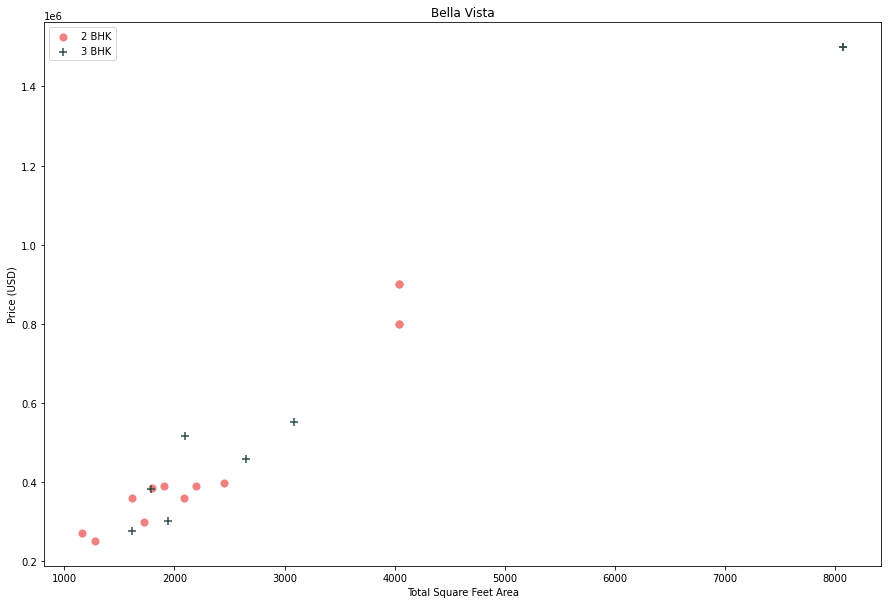

In [116]:
def plot_scatter_chart(data,location):
    bhk2 = data[(data.location==location) & (data.bhk==2)]
    bhk3 = data[(data.location==location) & (data.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='lightcoral',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='darkslategray',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (USD)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data7,"Bella Vista")

Remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [117]:
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location, location_df in data.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return data.drop(exclude_indices,axis='index')
data8 = remove_bhk_outliers(data7)
# df8 = df7.copy()
data8.shape

(140, 7)

Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

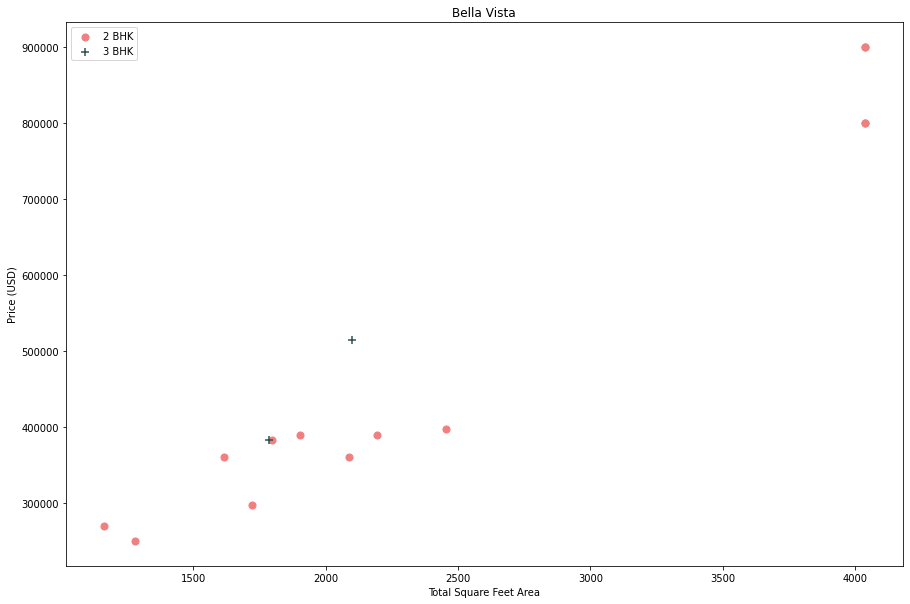

In [119]:
plot_scatter_chart(data8,"Bella Vista")



Based on above charts the data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function


Text(0, 0.5, 'Count')

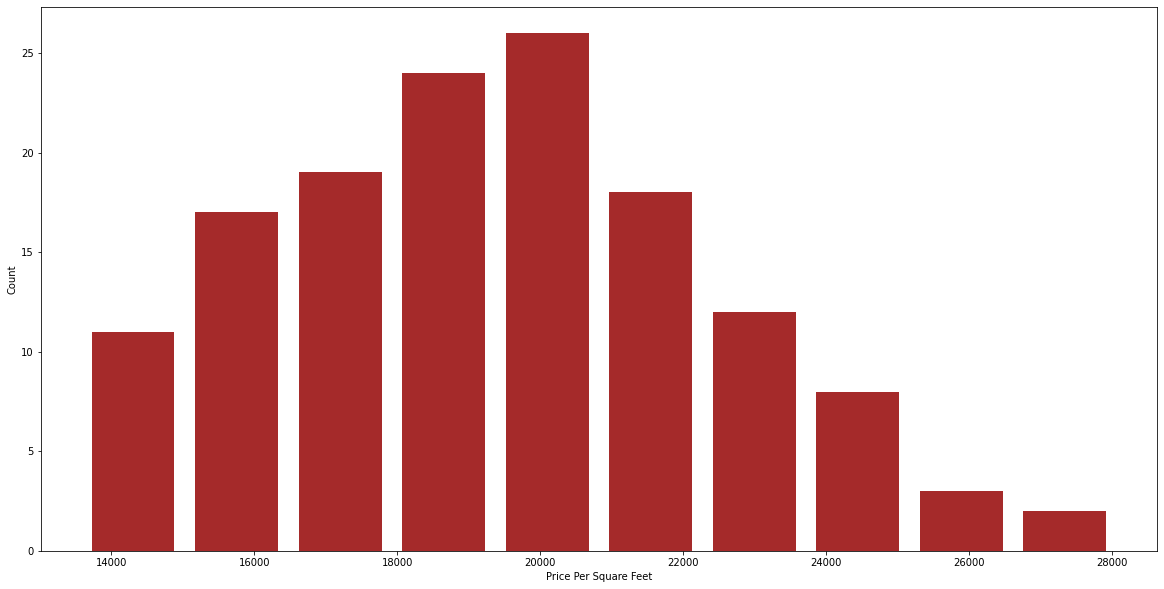

In [120]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data8.price_per_sqft,rwidth=0.8, color = "brown")
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Outlier Removal Using Bathrooms Feature

In [121]:
data8.bath.unique()

array([2, 3, 1, 4, 5, 6])

Text(0, 0.5, 'Count')

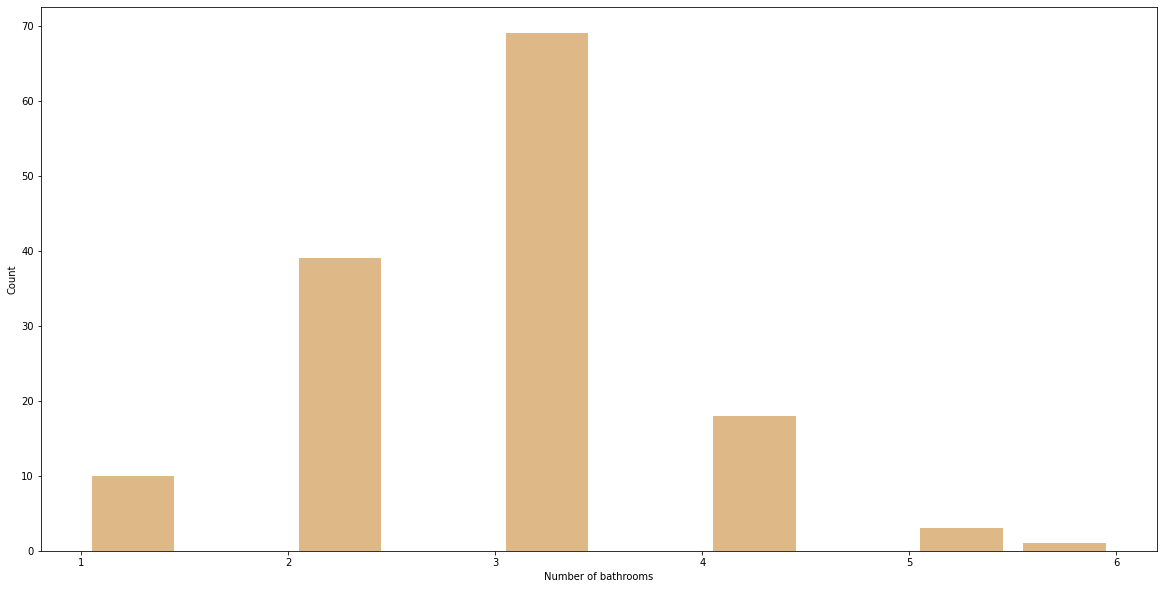

In [122]:
plt.hist(data8.bath,rwidth=0.8, color = "burlywood")
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [125]:
data8[data8.bath>3]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
36,Calidonia,2 BHK,6458.0,4,1500000,2,20843.914525
43,Calidonia,2 BHK,6458.0,4,1500000,2,20843.914525
52,Costa del Este,2 BHK,3552.0,4,620000,2,15664.076577
59,Costa del Este,2 BHK,5651.0,4,1300000,2,20644.487701
66,Costa del Este,3 BHK,6189.0,4,1350000,3,19574.890936
67,Costa del Este,2 BHK,4413.0,4,875000,2,17793.451167
71,Costa del Este,3 BHK,6738.0,4,1550000,3,20643.662808
78,Costa del Este,4 Bedroom,4768.0,5,1200000,4,22585.570470
88,"Costa del Este,Juan Díaz",3 BHK,7319.0,4,2000000,3,24522.475748
96,"Costa del Este,Juan Díaz",2 BHK,11840.0,5,2500000,2,18948.479730


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [126]:
data8[data8.bath>data8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
96,"Costa del Este,Juan Díaz",2 BHK,11840.0,5,2500000,2,18948.47973


In [127]:
data9 = data8[data8.bath<data8.bhk+2]
data9.shape

(127, 7)

In [128]:
data9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Bella Vista,2 BHK,1905.0,2,390000,2,18371.968504
2,Bella Vista,4 Bedroom,3735.0,3,950000,4,22825.435074


In [129]:
data10 = data9.drop(['size','price_per_sqft'],axis='columns')
data10.head(3)

,location,total_sqft,bath,price,bhk
0,Bella Vista,1905.0,2,390000,2
2,Bella Vista,3735.0,3,950000,4
3,Bella Vista,4036.0,3,800000,2


Use One Hot Encoding For Location

In [130]:
dummies = pd.get_dummies(data10.location)
dummies.head(3)

,Bella Vista,Calidonia,Costa del Este,"Costa del Este,Juan Díaz","Punta Pacifica, San francisco",San Francisco,other
0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0


In [131]:
data11 = pd.concat([data10,dummies.drop('other',axis='columns')],axis='columns')
data11.head()


,location,total_sqft,bath,price,bhk,Bella Vista,Calidonia,Costa del Este,"Costa del Este,Juan Díaz","Punta Pacifica, San francisco",San Francisco
0,Bella Vista,1905.0,2,390000,2,1,0,0,0,0,0
2,Bella Vista,3735.0,3,950000,4,1,0,0,0,0,0
3,Bella Vista,4036.0,3,800000,2,1,0,0,0,0,0
4,Bella Vista,4036.0,3,900000,4,1,0,0,0,0,0
5,Bella Vista,1615.0,2,360000,2,1,0,0,0,0,0


In [134]:
data12 = data11.drop('location',axis='columns')
data12.head(2)

,total_sqft,bath,price,bhk,Bella Vista,Calidonia,Costa del Este,"Costa del Este,Juan Díaz","Punta Pacifica, San francisco",San Francisco
0,1905.0,2,390000,2,1,0,0,0,0,0
2,3735.0,3,950000,4,1,0,0,0,0,0


**Build a Model Now**

In [135]:
data12.shape

(127, 10)

In [136]:
X = data12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,Bella Vista,Calidonia,Costa del Este,"Costa del Este,Juan Díaz","Punta Pacifica, San francisco",San Francisco
0,1905.0,2,2,1,0,0,0,0,0
2,3735.0,3,4,1,0,0,0,0,0
3,4036.0,3,2,1,0,0,0,0,0


In [137]:
X.shape

(127, 9)

In [138]:
y = data12.price
y.head(3)

0    390000
2    950000
3    800000
Name: price, dtype: int64

In [139]:
len(y)

127

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [141]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9151244107391909

Use K Fold cross validation to measure accuracy of our LinearRegression model

In [142]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.92356152, 0.94872453, 0.91578297, 0.95572446, 0.94622797])

Find best model using GridSearchCV

In [143]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.938004,{'normalize': True}
1,lasso,0.938012,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.848601,"{'criterion': 'mse', 'splitter': 'best'}"


Test the model for few properties

In [144]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [146]:
predict_price('Bella Vista',1000, 1, 2)

160940.02181573026

In [155]:
predict_price('Calidonia',700, 1, 1)

22232.045854563214

In [148]:
predict_price('San Francisco',1000, 2, 2)

75492.72128550318